In [1]:
# 데이터 불러오기
import pandas as pd

df = pd.read_csv(r"C:\Users\tjdgu\CodingFiles\AI_Introduction\week5\heart.csv")

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
# 결측치 확인
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [3]:
# 'target' 컬럼을 제외한 데이터를 X로 설정
X = df.drop('target', axis=1)   # axis=0: 행방향, "=1: 열방향

# 'target' 컬럼만 y로 설정
y = df['target']

In [4]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [5]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [6]:
Y = pd.get_dummies(y).values    #원핫인코딩 후 numpy 배열형태로 변환환

In [7]:
Y

array([[False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [Fal

In [8]:
X = X.values

In [9]:
X

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [10]:
# 훈련, 테스트 데이터로 데이터 나누기 (8:2비율)
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [11]:
# 훈련, 테스트 데이터 형태 확인 : (샘플개수, 특성개수)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242, 2), (61, 2))

In [12]:
# 모델 설계
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()


model.add(Dense(32,input_shape=(13,),activation='relu'))    # 입력층: 10개 뉴런, 13개의 입력값
model.add(Dense(8,activation='relu'))   # 은닉층
model.add(Dense(6,activation='relu'))
model.add(Dense(2,activation='softmax'))    # 출력층

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])    # 모델 컴파일

model.summary() # 모델 구조 요약

c:\Users\tjdgu\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            14 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 780 (3.05 KB)

 Trainable params: 780 (3.05 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test))
# 30번 반복학습, 한번에 32개씩 학습, 학습 중간중간 테스트 테이터로 성능 확인


Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.4472 - loss: 3.8504 - val_accuracy: 0.4098 - val_loss: 1.5881
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4042 - loss: 1.5593 - val_accuracy: 0.4262 - val_loss: 1.1360
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4858 - loss: 1.0444 - val_accuracy: 0.5902 - val_loss: 0.7862
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5787 - loss: 0.9262 - val_accuracy: 0.6721 - val_loss: 0.7440
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6088 - loss: 0.7845 - val_accuracy: 0.6066 - val_loss: 0.7124
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6132 - loss: 0.7380 - val_accuracy: 0.6721 - val_loss: 0.6571
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5927 - loss: 0.7233 - val_accuracy: 0.6066 - val_loss: 0.6663
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6032 - loss: 0.7063 - val_accuracy: 0.6230 - val_loss: 0.6756
Epoch 9

In [14]:
import numpy as np

y_pred = model.predict(X_test)  # 테스트데이터로 예측
y_test_class = np.argmax(y_test,axis=1) # 원핫인코딩 -> 정답 클래스 번호로 변환
y_pred_class = np.argmax(y_pred,axis=1) # 원핫인코딩 -> 예측값 클래스 번호로 변환

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


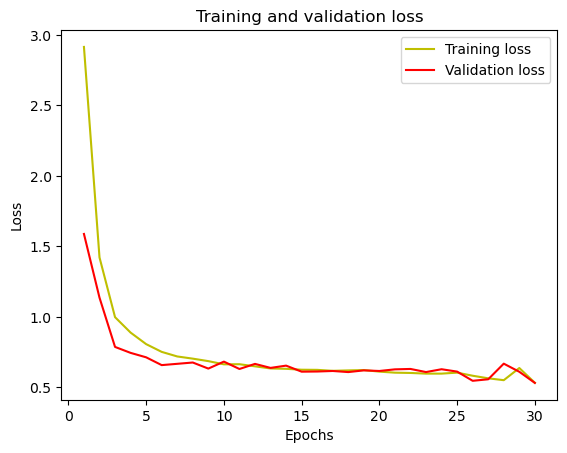

In [15]:
# 손실값 시각화
import matplotlib.pyplot as plt

loss =model_history.history['loss'] # 훈련 데이터에서의 손실값
val_loss =model_history.history['val_loss'] # 테스트 데이터에서의 손실값
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

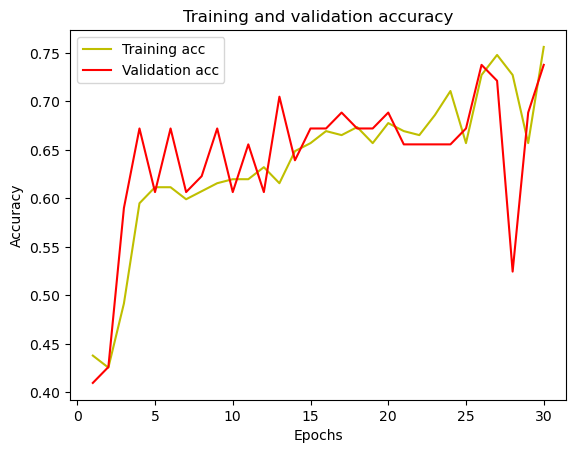

In [16]:
# 정확도 시각화
acc =model_history.history['accuracy']  # 학습용 정확도
val_acc =model_history.history['val_accuracy']  #테스트용 정확도
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
# 모델 평가
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.76      0.59      0.67        27
           1       0.72      0.85      0.78        34

    accuracy                           0.74        61
   macro avg       0.74      0.72      0.73        61
weighted avg       0.74      0.74      0.73        61

[[16 11]
 [ 5 29]]


In [18]:
# 하이퍼파라미터 튜닝(for문 사용)
from keras.optimizers import SGD,Adam

epoch_list = [10, 20]
batch_list = [16, 32]
optimizer_list = ['adam', 'sgd']

results = []

for epochs in epoch_list:
    for batch_size in batch_list:
        for opt_name in optimizer_list:
            print(f"▶ epochs={epochs}, batch_size={batch_size}, optimizer={opt_name}")
            optimizer = Adam() if opt_name == 'adam' else SGD()

            model = Sequential()
            model.add(Dense(32, input_shape=(13,), activation='relu'))
            model.add(Dense(8, activation='relu'))
            model.add(Dense(6, activation='relu'))
            model.add(Dense(2, activation='softmax'))

            model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                                validation_data=(X_test, y_test), verbose=0)

            loss, acc = model.evaluate(X_test, y_test, verbose=0)
            print(f"Test Accuracy: {acc:.4f}\n")

            results.append({
                'epochs': epochs,
                'batch_size': batch_size,
                'optimizer': opt_name,
                'accuracy': acc
            })

# 결과 정리
df_result = pd.DataFrame(results)
df_result.sort_values(by='accuracy', ascending=False)

▶ epochs=10, batch_size=16, optimizer=adam


c:\Users\tjdgu\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.6885

▶ epochs=10, batch_size=16, optimizer=sgd
Test Accuracy: 0.5574

▶ epochs=10, batch_size=32, optimizer=adam
Test Accuracy: 0.6885

▶ epochs=10, batch_size=32, optimizer=sgd
Test Accuracy: 0.5574

▶ epochs=20, batch_size=16, optimizer=adam
Test Accuracy: 0.7049

▶ epochs=20, batch_size=16, optimizer=sgd
Test Accuracy: 0.5574

▶ epochs=20, batch_size=32, optimizer=adam
Test Accuracy: 0.5246

▶ epochs=20, batch_size=32, optimizer=sgd
Test Accuracy: 0.5574



,epochs,batch_size,optimizer,accuracy
4,20,16,adam,0.704918
0,10,16,adam,0.688525
2,10,32,adam,0.688525
1,10,16,sgd,0.557377
3,10,32,sgd,0.557377
5,20,16,sgd,0.557377
7,20,32,sgd,0.557377
6,20,32,adam,0.524590
